In [1]:
import pandas as pd

data_path = './data/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


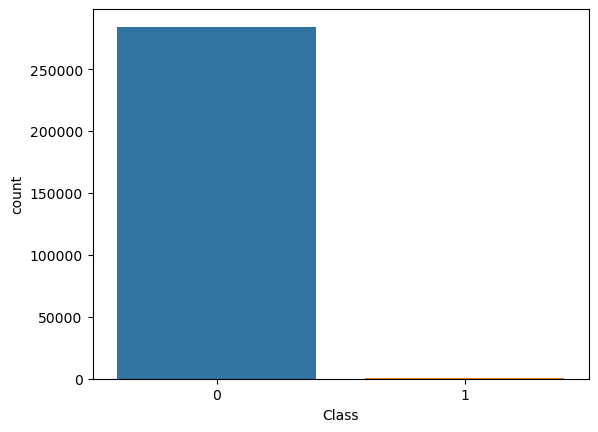

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = raw_data['Class'], data = raw_data)
plt.show()

In [4]:
raw_data['Class'].value_counts() # 데이터의 불균형이 심해보인다.

0    284315
1       492
Name: Class, dtype: int64

In [5]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
X = raw_data.iloc[:, 1:-1] # V1 ~ Amount 컬럼까지
y = raw_data.iloc[:, -1] # Class 컬럼

X.shape, y.shape

((284807, 29), (284807,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

In [8]:
# train, test 셋의 데이터 불균형 체크

import numpy as np

np.unique(y_train, return_counts = True)

(array([0, 1], dtype=int64), array([227451,    394], dtype=int64))

In [10]:
tmp = np.unique(y_train, return_counts = True)
tmp[1] / len(y_train) * 100

array([99.82707542,  0.17292458])

# 첫번째 시도

In [11]:
# 분류기 성능을 return하는 함수

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    return acc , pre, recall, f1, roc_auc


In [18]:
# confusion matrix 출력 함수

from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, recall, f1, auc = get_clf_eval(y_test, pred)

    print('***Confusion matrix***')
    print(confusion)
    print('***********************')

    print("Accuracy : {0:.4f} , Precision : {1:.4f}".format(acc, pre))
    print("Recall : {0:.4f} , F1 : {1:.4f}, AUC : {2:.4f}".format(recall, f1, auc))

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

***Confusion matrix***
[[56856     8]
 [   40    58]]
***********************
Accuracy : 0.9992 , Precision : 0.8788
Recall : 0.5918 , F1 : 0.7073, AUC : 0.7958


In [21]:
np.unique(y_test, return_counts = True)[1]

array([56864,    98], dtype=int64)

해당 문제에서는 데이터의 불균형도 있기 때문에 Recall(실제 1을 1로 잘 예측했는가)을 보는 것이 더 좋아보인다.

Logistic Regression에선 Recall의 성능이 그렇게 좋아보이진 않음.

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13,max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

***Confusion matrix***
[[56856     8]
 [   33    65]]
***********************
Accuracy : 0.9993 , Precision : 0.8904
Recall : 0.6633 , F1 : 0.7602, AUC : 0.8316


Logistic보단 좋아보임

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

***Confusion matrix***
[[56857     7]
 [   25    73]]
***********************
Accuracy : 0.9994 , Precision : 0.9125
Recall : 0.7449 , F1 : 0.8202, AUC : 0.8724


성능이 더 좋아졌다!

## LightGBM

In [24]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000,
                          num_leaves=64)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Recall과 Precision을 다시 살펴보자.

은행 입장에서는 모든 사기범을 잡고자하니 Recall을 성능 지표로 고르는 것이 좋고 
아마 사용자 입장에서는 Recall이 높아지면 정상 사용자여도 의심을 받을 수 있으니 그와 반대되는 Precision을 성능 지표로 고르는 것이 좋을 것이다라고 생각할 수 있을 것이다.


In [26]:
# 모델과 데이터 입력시 성능을 출력하는 함수

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [27]:
# 다수의 모델들의 성능을 정리하여 데이터프레임으로 반환하는 함수

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuaracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train , y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index = model_names)

앞서 돌린 모델들을 한번에 표로 정리해보자.

In [29]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,accuaracy,precision,recall,f1,roc_auc
LogisticReg,0.999157,0.878788,0.591837,0.707317,0.795848
DecisionTree,0.999280,0.890411,0.663265,0.760234,0.831562
RandomForest,0.999438,0.912500,0.744898,0.820225,0.872387
LightGBM,0.997174,0.168421,0.163265,0.165803,0.580938


# 두번째 시도

데이터 전처리를 진행하고 모델을 다시 돌려보자.

C:\Users\nabi4\AppData\Local\Temp\ipykernel_22400\576895490.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color = 'r')


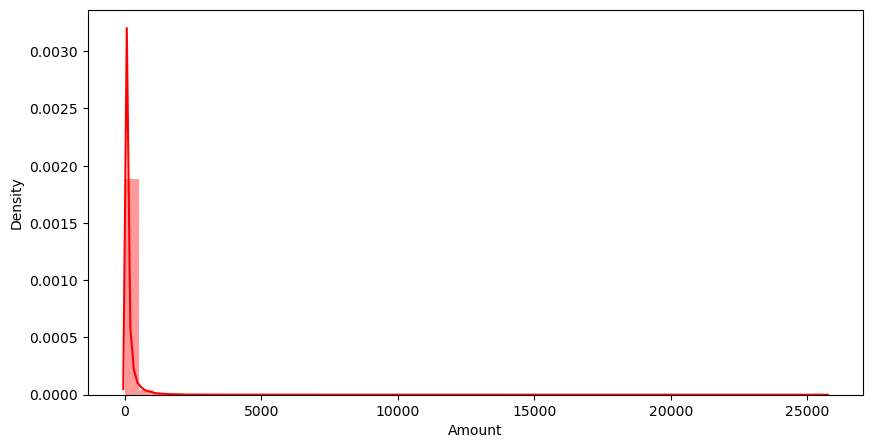

In [30]:
# 'amount'(신용카드 사용 금액) 컬럼 확인

plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color = 'r')
plt.show()

특정 범위에 너무 몰려있다.

만약 사기범을 잡는데에 'Amount' 컬럼이 영향을 끼친다면, 데이터분포가 좀 더 고르게 되어있어야 성능이 좋아지므로 StandardScaler를 적용해보자.

In [32]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [36]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

In [37]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,accuaracy,precision,recall,f1,roc_auc
LogisticReg,0.999157,0.878788,0.591837,0.707317,0.795848
DecisionTree,0.999280,0.890411,0.663265,0.760234,0.831562
RandomForest,0.999438,0.912500,0.744898,0.820225,0.872387
LightGBM,0.996910,0.180328,0.224490,0.200000,0.611366


그렇게 큰 차이는 없어보인다.

In [38]:
# roc 커브
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])

    plt.plot([0,1], [0,1], 'k--', label = 'random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

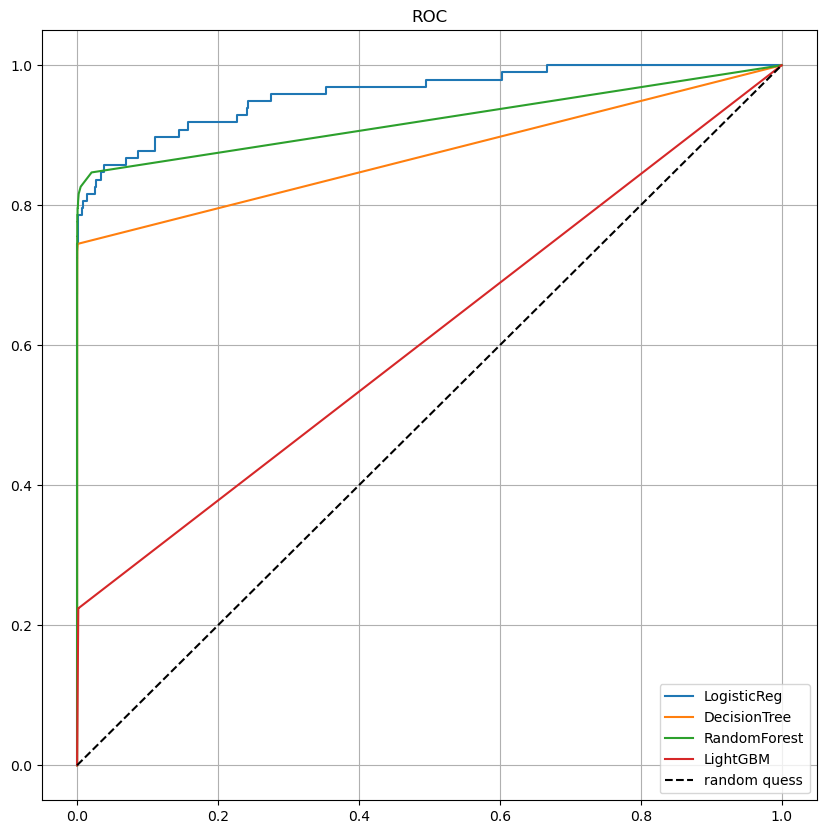

In [39]:
draw_roc_curve(models, model_names, X_test, y_test)

roc curve만 보았을 땐 logistic과 random forest가 좋아보인다.

StandardScaler 말고 log를 취하면 어떨까?

In [42]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


C:\Users\nabi4\AppData\Local\Temp\ipykernel_22400\1497388195.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')


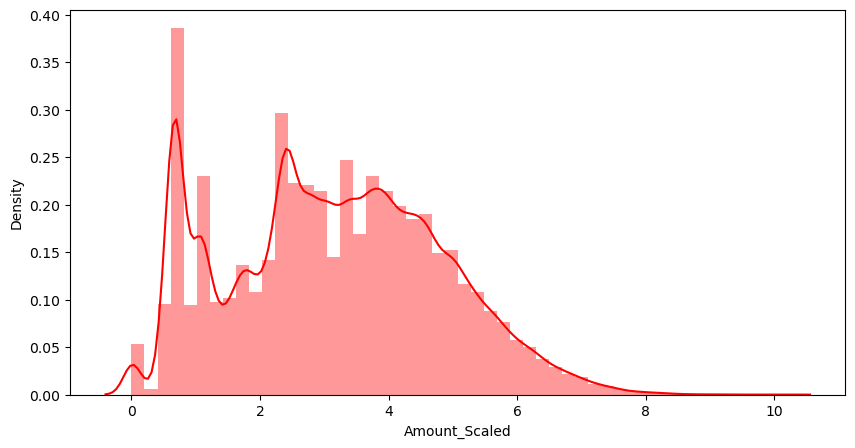

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')
plt.show()

데이터가 골고루 퍼졌다.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,accuaracy,precision,recall,f1,roc_auc
LogisticReg,0.999157,0.878788,0.591837,0.707317,0.795848
DecisionTree,0.999280,0.890411,0.663265,0.760234,0.831562
RandomForest,0.999438,0.912500,0.744898,0.820225,0.872387
LightGBM,0.997174,0.168421,0.163265,0.165803,0.580938


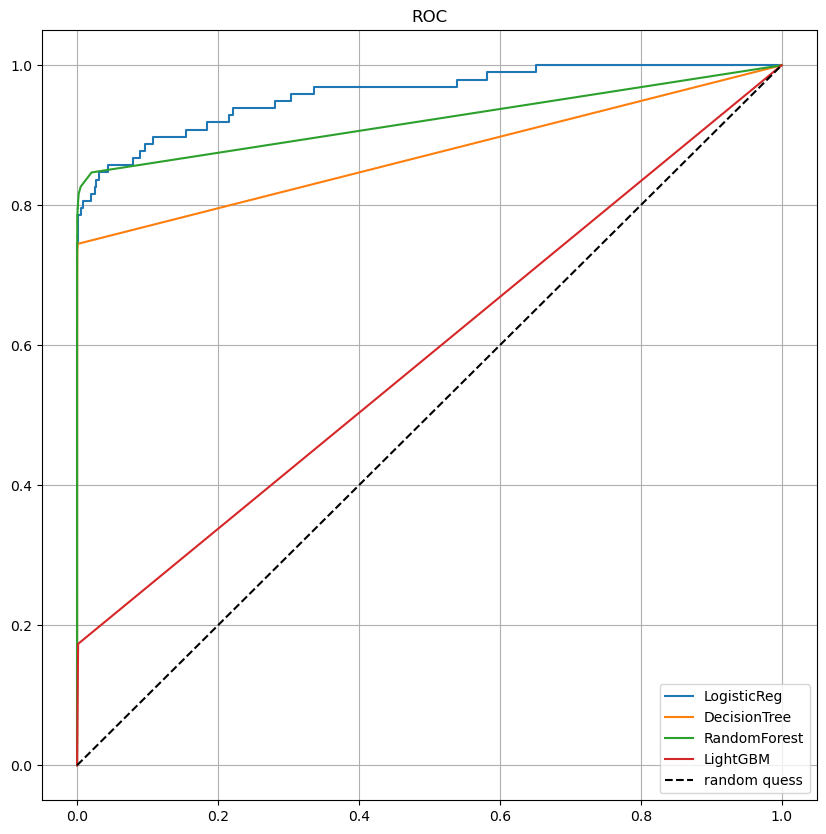

In [45]:
draw_roc_curve(models, model_names, X_test, y_test)

이 또한 성능이 크게 차이가 나는 것은 아니다.

# 세번째 시도

이상치들도 정리해보자

In [47]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

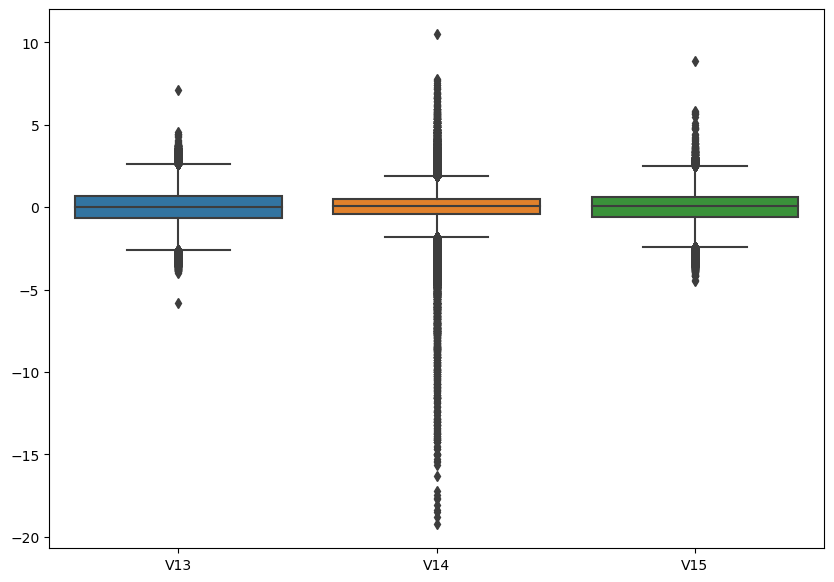

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(data = raw_data[['V13', 'V14', 'V15']])

In [51]:
# boxplot의 IQR을 이용한 이상치들의 인덱스를 파악하는 코드

def get_outlier(df = None, column = None, weight = 1.5):
    fraud = df[df['Class'] == 1][column] # fraud 데이터에 대해서만 이상치를 찾아볼 예정
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [52]:
get_outlier(df = raw_data, column= 'V14', weight = 1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [53]:
raw_data_copy.shape

(284807, 29)

In [54]:
outlier_index = get_outlier(df = raw_data, column= 'V14', weight = 1.5)

raw_data_copy.drop(outlier_index, axis = 0, inplace = True)
raw_data_copy.shape

(284803, 29)

In [ ]:
# 이상치를 삭제하기 위함 -> 이후 y만 추출
raw_data.drop(outlier_index, axis = 0, inplace = True)

In [58]:
X = raw_data_copy
y = raw_data.iloc[:, -1] # 이상치를 제거한 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 390, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227842, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001712 -> initscore=-6.368548
[LightGBM] [Info] Start training from score -6.368548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,accuaracy,precision,recall,f1,roc_auc
LogisticReg,0.999333,0.905405,0.683673,0.779070,0.841775
DecisionTree,0.999491,0.879121,0.816327,0.846561,0.908067
RandomForest,0.999631,0.913978,0.867347,0.890052,0.933603
LightGBM,0.999157,0.790698,0.693878,0.739130,0.846781


성능이 좀 좋아진 것 같기두!?

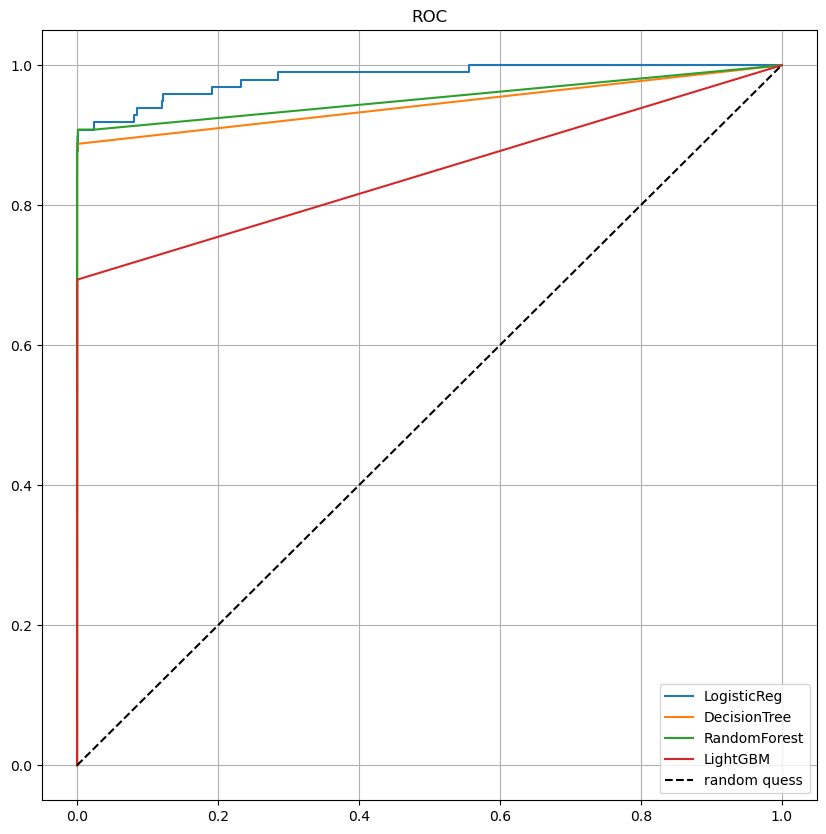

In [59]:
draw_roc_curve(models, model_names, X_test, y_test)

# 네번째 시도

이 데이터는 데이터의 불균형이 있었다. 이 데이터 불균형을 해소해보자.

In [61]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------------------- 235.6/235.6 kB 14.1 MB/s eta 0:00:00


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)

이때 데이터를 조작하는 것은 Train 데이터에 한해서다.

Scaler는 간단한 작업이라 괜찮지만, 원칙적으로는 Test 데이터에 어떠한 작업도 하면 안된다.(데이터가 왜곡되기 때문)

In [64]:
X_train.shape, y_train.shape

((227842, 29), (227842,))

In [65]:
X_train_over.shape, y_train_over.shape

((454904, 29), (454904,))

In [66]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([227452,    390], dtype=int64))
(array([0, 1], dtype=int64), array([227452, 227452], dtype=int64))


In [67]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 227452, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

,accuaracy,precision,recall,f1,roc_auc
LogisticReg,0.973385,0.056320,0.918367,0.106132,0.945924
DecisionTree,0.969944,0.049665,0.908163,0.094180,0.939107
RandomForest,0.999614,0.887755,0.887755,0.887755,0.943781
LightGBM,0.999561,0.876289,0.867347,0.871795,0.933568


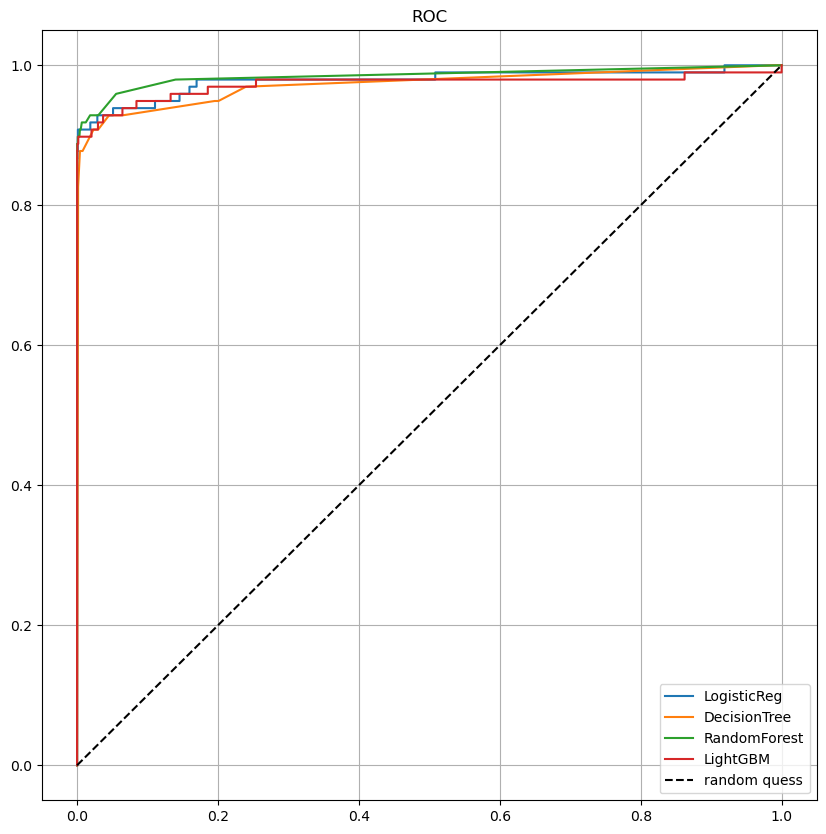

In [68]:
draw_roc_curve(models, model_names, X_test, y_test)